<a href="https://colab.research.google.com/github/aicommons-dev/ai-assisted-farming--salvage/blob/master/BETA_FARM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub
print(f"Hub version is {hub.__version__}")
print("GPU is available" if tf.config.list_physical_devices("GPU") else "GPU not available")

Hub version is 0.8.0
GPU is available


In [ ]:
#importing label file
labels_csv = pd.read_csv('/content/drive/My Drive/BETA-FARM/labels-edited.csv')
print(labels_csv.describe())
print(labels_csv.sample(5))

                         ID                         NAME
count                  2000                         2000
unique                 2000                           20
top     Apple___Black_rot24  Corn_(maize)___Common_rust_
freq                      1                          100
                              ID                      NAME
1284           Grape___healthy84           Grape___healthy
289   Apple___Cedar_apple_rust89  Apple___Cedar_apple_rust
1833   Tomato___Bacterial_spot33   Tomato___Bacterial_spot
1073         Grape___Black_rot73         Grape___Black_rot
1231           Grape___healthy31           Grape___healthy


In [ ]:
labels_csv['NAME'].value_counts()

Corn_(maize)___Common_rust_                           100
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot    100
Orange___Haunglongbing_(Citrus_greening)              100
Grape___healthy                                       100
Apple___healthy                                       100
Soybean___healthy                                     100
Cherry_(including_sour)___healthy                     100
Tomato___Late_blight                                  100
Corn_(maize)___Northern_Leaf_Blight                   100
Apple___Black_rot                                     100
Corn_(maize)___healthy                                100
Pepper,_bell___Bacterial_spot                         100
Tomato___Bacterial_spot                               100
Potato___healthy                                      100
Grape___Esca_(Black_Measles)                          100
Apple___Cedar_apple_rust                              100
Blueberry___healthy                                   100
Grape___Black_

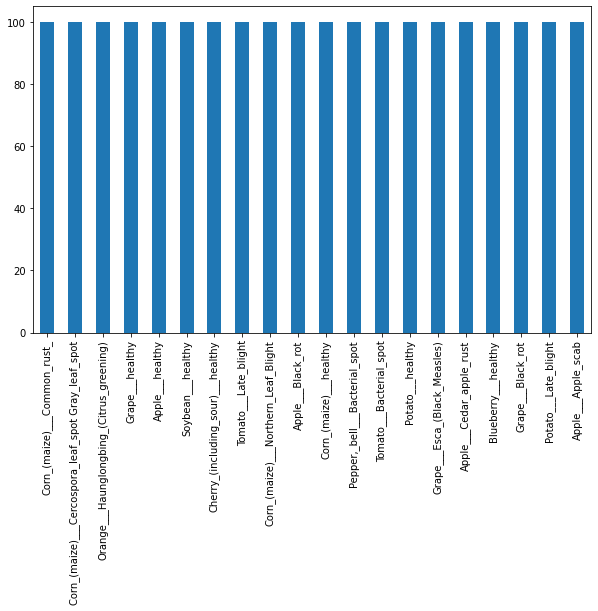

In [ ]:
labels_csv['NAME'].value_counts().plot.bar(figsize=(10,6))

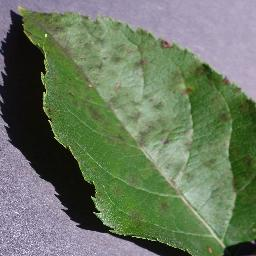

In [ ]:
from IPython.display import Image
Image('/content/drive/My Drive/BETA-FARM/Plant___Village/Apple___Apple_scab15.jpg')

In [ ]:
labels_csv.head()

,ID,NAME
0,Apple___Apple_scab0,Apple___Apple_scab
1,Apple___Apple_scab1,Apple___Apple_scab
2,Apple___Apple_scab2,Apple___Apple_scab
3,Apple___Apple_scab3,Apple___Apple_scab
4,Apple___Apple_scab4,Apple___Apple_scab


In [ ]:
filenames = [fname for fname in labels_csv['ID']]
len(filenames)

2000

In [ ]:
filepaths = ['/content/drive/My Drive/BETA-FARM/Plant___Village/'
+ fname for fname in labels_csv['ID'] + '.jpg']
print(filepaths[:10])

['/content/drive/My Drive/BETA-FARM/Plant___Village/Apple___Apple_scab0.jpg', '/content/drive/My Drive/BETA-FARM/Plant___Village/Apple___Apple_scab1.jpg', '/content/drive/My Drive/BETA-FARM/Plant___Village/Apple___Apple_scab2.jpg', '/content/drive/My Drive/BETA-FARM/Plant___Village/Apple___Apple_scab3.jpg', '/content/drive/My Drive/BETA-FARM/Plant___Village/Apple___Apple_scab4.jpg', '/content/drive/My Drive/BETA-FARM/Plant___Village/Apple___Apple_scab5.jpg', '/content/drive/My Drive/BETA-FARM/Plant___Village/Apple___Apple_scab6.jpg', '/content/drive/My Drive/BETA-FARM/Plant___Village/Apple___Apple_scab7.jpg', '/content/drive/My Drive/BETA-FARM/Plant___Village/Apple___Apple_scab8.jpg', '/content/drive/My Drive/BETA-FARM/Plant___Village/Apple___Apple_scab9.jpg']


In [ ]:
import os
if len(os.listdir('/content/drive/My Drive/BETA-FARM/Plant___Village/')) == len(filepaths):
  print("Files are complete")
else:
  print("Files are incomplete")

Files are complete


In [ ]:
len(os.listdir('/content/drive/My Drive/BETA-FARM/Plant___Village/'))

2000

In [ ]:
os.listdir('/content/drive/My Drive/BETA-FARM/Plant___Village/')

['Potato___healthy60.jpg',
 'Potato___healthy47.jpg',
 'Potato___healthy98.jpg',
 'Potato___healthy26.jpg',
 'Potato___healthy21.jpg',
 'Potato___healthy88.jpg',
 'Potato___healthy80.jpg',
 'Potato___healthy69.jpg',
 'Potato___healthy52.jpg',
 'Potato___healthy85.jpg',
 'Potato___healthy4.jpg',
 'Potato___healthy93.jpg',
 'Potato___healthy64.jpg',
 'Potato___healthy97.jpg',
 'Potato___healthy61.jpg',
 'Potato___healthy86.jpg',
 'Potato___healthy28.jpg',
 'Potato___healthy79.jpg',
 'Potato___healthy17.jpg',
 'Potato___healthy55.jpg',
 'Potato___healthy82.jpg',
 'Potato___healthy41.jpg',
 'Potato___healthy99.jpg',
 'Potato___healthy45.jpg',
 'Potato___healthy27.jpg',
 'Potato___healthy18.jpg',
 'Potato___healthy46.jpg',
 'Potato___healthy30.jpg',
 'Potato___healthy29.jpg',
 'Potato___healthy94.jpg',
 'Potato___healthy71.jpg',
 'Potato___healthy1.jpg',
 'Potato___healthy83.jpg',
 'Potato___healthy40.jpg',
 'Potato___healthy5.jpg',
 'Potato___healthy59.jpg',
 'Potato___healthy95.jpg',
 'Po

In [ ]:
labels = np.array(labels_csv['NAME'])
print(labels)

#Find the number of unique labels
labels_unique = np.unique(labels)
labels_unique

['Apple___Apple_scab' 'Apple___Apple_scab' 'Apple___Apple_scab' ...
 'Tomato___Late_blight' 'Tomato___Late_blight' 'Tomato___Late_blight']


array(['Apple___Apple_scab', 'Apple___Black_rot',
       'Apple___Cedar_apple_rust', 'Apple___healthy',
       'Blueberry___healthy', 'Cherry_(including_sour)___healthy',
       'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
       'Corn_(maize)___Common_rust_',
       'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy',
       'Grape___Black_rot', 'Grape___Esca_(Black_Measles)',
       'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)',
       'Pepper,_bell___Bacterial_spot', 'Potato___Late_blight',
       'Potato___healthy', 'Soybean___healthy', 'Tomato___Bacterial_spot',
       'Tomato___Late_blight'], dtype=object)

In [ ]:
len(labels_unique)

20

In [ ]:
#turning all labels into boolean values
boolean_labels = [label == labels_unique for label in labels]
#print(boolean_labels)
len(boolean_labels)

2000

In [ ]:
print(labels[200])
print(np.where(labels_unique == labels[200]))  #index where label occurs
print(boolean_labels[200].argmax())    # index where label occurs in boolean array
print(boolean_labels[200].astype(int))    #there should be a 1 where label occurs 

Apple___Cedar_apple_rust
(array([2]),)
2
[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
labels[200]

'Apple___Cedar_apple_rust'

In [ ]:
X = filepaths
y = boolean_labels

In [ ]:
NUM_IMAGES = 500 #@param {type:"slider", min:10, max:2000, step:15}

In [ ]:
len(filepaths)

2000

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES], y[:NUM_IMAGES], test_size=0.3, random_state=42)

In [ ]:
print(len(X_train))
print(len(X_val))
print(len(y_train))
print(len(y_val))

350
150
350
150


In [ ]:
from matplotlib.pyplot import imread
image = imread(filepaths[42])
image.shape

(256, 256, 3)

In [ ]:
#turn image into a tensor
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 256, 3), dtype=uint8, numpy=
array([[[127, 120, 151],
        [127, 120, 151],
        [127, 120, 151],
        ...,
        [122, 115, 146],
        [123, 116, 147],
        [124, 117, 148]],

       [[111, 104, 135],
        [121, 114, 145],
        [133, 126, 157],
        ...,
        [129, 122, 153],
        [128, 121, 152],
        [127, 120, 151]]], dtype=uint8)>

In [ ]:
img_size = 224

def process_image(image_path):
  '''Functtion to process images from the image path'''
  image1 = tf.io.read_file(image_path)

  #turn the image into numerical tensors with three colour channels (r, g, b)
  image1 = tf.image.decode_jpeg(image1, channels=3)

  #convert the image colour channels from 0-255 to 0-1
  image1 = tf.image.convert_image_dtype(image1, tf.float32)

  #resize the image
  image1 = tf.image.resize(image1, size=[img_size, img_size])

  return image1

In [ ]:
image2 = tf.io.read_file(filepaths[42])
image2 = tf.image.decode_jpeg(image2, channels=3)
image2 = tf.image.convert_image_dtype(image2, tf.float32)
print(image2)

tf.Tensor(
[[[0.49411768 0.47058827 0.5803922 ]
  [0.49803925 0.47450984 0.58431375]
  [0.49411768 0.47058827 0.5803922 ]
  ...
  [0.4784314  0.454902   0.5647059 ]
  [0.4784314  0.454902   0.5647059 ]
  [0.48235297 0.45882356 0.5686275 ]]

 [[0.43529415 0.41176474 0.52156866]
  [0.47058827 0.44705886 0.5568628 ]
  [0.52156866 0.49803925 0.60784316]
  ...
  [0.5019608  0.4784314  0.5882353 ]
  [0.5019608  0.4784314  0.5882353 ]
  [0.49803925 0.47450984 0.58431375]]

 [[0.48627454 0.46274513 0.57254905]
  [0.5019608  0.4784314  0.5882353 ]
  [0.52156866 0.49803925 0.60784316]
  ...
  [0.50980395 0.48627454 0.59607846]
  [0.49411768 0.47058827 0.5803922 ]
  [0.47450984 0.45098042 0.56078434]]

 ...

 [[0.8705883  0.8862746  0.9294118 ]
  [0.8705883  0.8862746  0.9294118 ]
  [0.8745099  0.89019614 0.9333334 ]
  ...
  [0.09803922 0.09019608 0.17254902]
  [0.09803922 0.09019608 0.17254902]
  [0.09803922 0.09019608 0.17254902]]

 [[0.87843144 0.8941177  0.93725497]
  [0.87843144 0.8941177  0

In [ ]:
#turning our images into batches

def get_image_label(image_path, label):
  '''Takes an image filepath and the corresponding label and 
  process the iage and return a tuple of tensors and label'''

  image = process_image(image_path)

  return image, label

In [ ]:
(process_image(X[42]), y[42])

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.49035618, 0.46682677, 0.5766307 ],
         [0.49607846, 0.47254905, 0.58235294],
         [0.49277714, 0.46924773, 0.5790516 ],
         ...,
         [0.479912  , 0.4563826 , 0.5661865 ],
         [0.48011208, 0.45658267, 0.5663866 ],
         [0.48323336, 0.45970395, 0.5695079 ]],
 
        [[0.44843942, 0.42491   , 0.5347139 ],
         [0.48679477, 0.46326533, 0.5730693 ],
         [0.5287715 , 0.5052421 , 0.615046  ],
         ...,
         [0.5005404 , 0.47701094, 0.5868148 ],
         [0.5010004 , 0.477471  , 0.5872749 ],
         [0.4935173 , 0.4699879 , 0.5797918 ]],
 
        [[0.49919972, 0.4756703 , 0.5854742 ],
         [0.50456184, 0.48103243, 0.59083635],
         [0.50826335, 0.4847339 , 0.59453785],
         ...,
         [0.4981994 , 0.47467   , 0.5844739 ],
         [0.48577422, 0.4622448 , 0.57204866],
         [0.4594034 , 0.435874  , 0.5456779 ]],
 
        ...,
 
        [[0.86778724, 0.8834735 

Definitng a function to convert our data into batches of 32

In [ ]:
BATCH_SIZE = 32

#Creating the function
def create_data_batches(X, y=None, batch_size=BATCH_SIZE, test_data=False, valid_data=False):
  '''
  Creates batches of data out of image (X) and label (y)
  Shuffles the data if it is trainingbut doesn't shuffle if it is validation data.
  And also accept test data as input (no labels)
  '''

  if test_data:
    print("creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices(tf.constant(X))  #only filepaths no labels
    data_batch = data.map(process_image).batch(BATCH_SIZE)

    return data_batch

  #if the data is a validation data, we don't need to shuffle it
  if valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), #filepaths
                                               tf.constant(y))) #labels
    data_batches = data.map(get_image_label).batch(BATCH_SIZE)

    return data_batches

  else:
    print("Creating training data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), #filepaths
                                              tf.constant(y))) #labels
    #shuffling filepaths and labels before mapping image processor is faster than shuffling images
    data = data.shuffle(buffer_size=len(X))
    data = data.map(get_image_label)
    data_batches = data.batch(BATCH_SIZE)

    return data_batches

In [ ]:
#Creating training and validation data batches

train_data = create_data_batches(X_train, y_train)
valid_data = create_data_batches(X_val, y_val, valid_data=True)

Creating training data batches...
Creating validation data batches...


In [ ]:
#Checking out the attributes of our data batches
print(train_data.element_spec)
print(valid_data.element_spec)

(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 20), dtype=tf.bool, name=None))
(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 20), dtype=tf.bool, name=None))


Visualizing Data Batches

In [ ]:
import matplotlib.pyplot as plt
def show_25_images(images, labels):
  '''
  Displays a plot of 25 images and their labels from a data batch
  '''
  plt.figure(figsize=(10,10))
  for i in range(25):
    ax = plt.subplot(5, 5, i+1)
    plt.imshow(images[i])
    plt.title(labels_unique[labels[i].argmax()])


In [ ]:
labels_unique[y[450].argmax()]

'Blueberry___healthy'

In [ ]:
#unbatching train data
train_images, train_labels = next(train_data.as_numpy_iterator())
#train_images, train_labels

In [ ]:
valid_images1, valid_labels1 = next(valid_data.as_numpy_iterator())

In [ ]:
len(train_images), len(train_labels)

(32, 32)

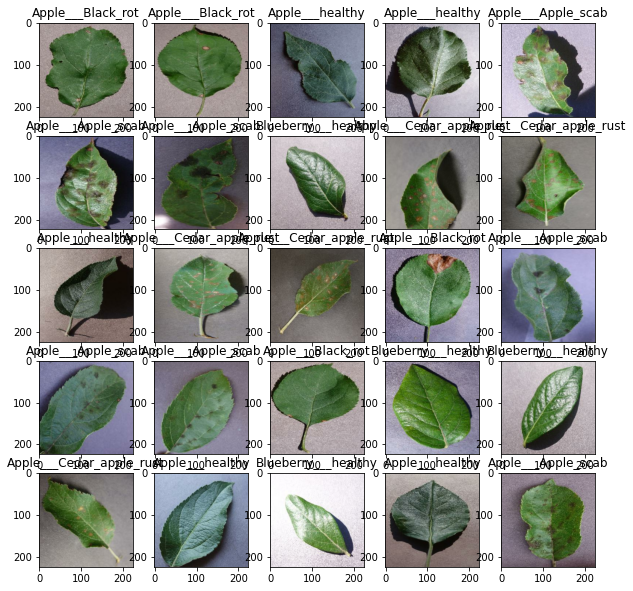

In [ ]:
#Visualizing the data in a train batch

show_25_images(train_images, train_labels)

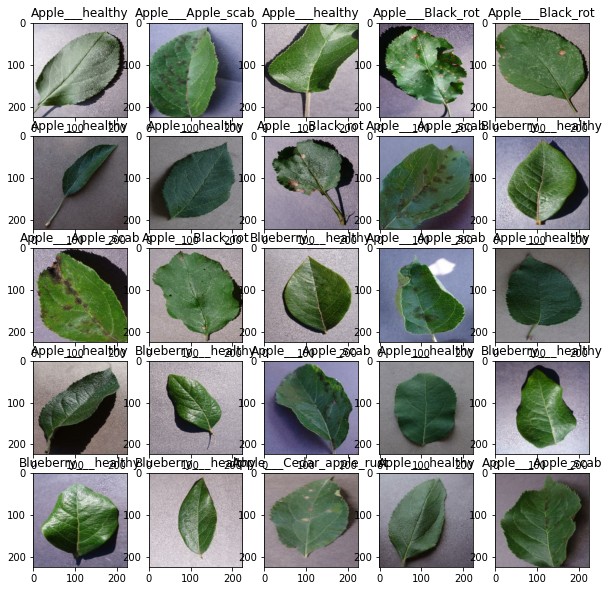

In [ ]:
valid_images, valid_labels = next(valid_data.as_numpy_iterator())
show_25_images(valid_images, valid_labels)

Building a model using transfer learning

In [ ]:
#setup input and shape to our model
INPUT_SHAPE = [None, img_size, img_size, 3] #batch, height, width, colour
OUTPUT_SHAPE = len(labels_unique)

#setup model URL from TensorFlow Hub
MODEL_URL = 'https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4'

In [ ]:
#Putting the input, output and model into a keras deep learning model!

def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print(f'Building model with {MODEL_URL}')

  #setup the model layers
  model = tf.keras.Sequential([hub.KerasLayer(MODEL_URL), #Layer 1 (Input layer)
                               tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                               activation='softmax') #Layer 2 (Output layer)
                               ])
  
  #compiling the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=['accuracy']
                )
  
  #build the model
  model.build(INPUT_SHAPE)

  return model

In [ ]:
model = create_model()
model.summary()

Building model with https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1001)              5432713   
_________________________________________________________________
dense (Dense)                (None, 20)                20040     
Total params: 5,452,753
Trainable params: 20,040
Non-trainable params: 5,432,713
_________________________________________________________________


Creating TensorBoard Callback

In [ ]:
#Load tensorboard notebook extension
%load_ext tensorboard

In [ ]:
import datetime

#Create function to build TensorBoard callback
def create_tensorboard_callback():
  #create a log directory fo storing TensorBoard logs
  logdir = os.path.join('drive/My Drive/ROCK_VISION/logs', 
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

Creating an Early Stopping Callback

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                                  patience=10)

Training our model (on a subset of data)

In [ ]:
NUM_EPOCHS = 30 #@param {type:"slider", min:10, max:100, step:10}
print("GPU", "is available" if tf.config.list_physical_devices("GPU") else "not available") 

GPU is available


Creating a function which runs the model

In [ ]:
def train_model():
  '''
  Trains a given model and returns the tarined version
  '''
  #create model
  model = create_model()

  #Createnew TensorBoard session anytime we train a model
  tensorboard = create_tensorboard_callback()

  #fit the data to the model passing it to the callbacks we created
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=valid_data,
            validation_freq=1,
            callbacks=[tensorboard, early_stopping])
  return model

In [ ]:
#Fit the model to the data
model = train_model()

Building model with https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/30
 1/11 [=>............................] - ETA: 0s - loss: 3.7889 - accuracy: 0.0625WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.


Instructions for updating:
use `tf.profiler.experimental.stop` instead.


11/11 [==============================] - 251s 23s/step - loss: 2.1202 - accuracy: 0.2686 - val_loss: 1.2031 - val_accuracy: 0.5467
Epoch 2/30
11/11 [==============================] - 1s 121ms/step - loss: 0.7892 - accuracy: 0.7343 - val_loss: 0.5392 - val_accuracy: 0.8200
Epoch 3/30
11/11 [==============================] - 1s 120ms/step - loss: 0.4037 - accuracy: 0.8971 - val_loss: 0.3373 - val_accuracy: 0.9133
Epoch 4/30
11/11 [==============================] - 1s 119ms/step - loss: 0.2492 - accuracy: 0.9629 - val_loss: 0.2423 - val_accuracy: 0.9467
Epoch 5/30
11/11 [==============================] - 1s 117ms/step - loss: 0.1787 - accuracy: 0.9743 - val_loss: 0.2121 - val_accuracy: 0.9467
Epoch 6/30
11/11 [==============================] - 1s 123ms/step - loss: 0.1418 - accuracy: 0.9743 - val_loss: 0.1945 - val_accuracy: 0.9600
Epoch 7/30
11/11 [==============================] - 1s 117ms/step - loss: 0.1188 - accuracy: 0.9800 - val_loss: 0.1761 - val_accuracy: 0.9533
Epoch 8/30
11/11 

In [ ]:
%tensorboard --logdir drive/My\ Drive/Plant___Village/logs

<IPython.core.display.Javascript object>

In [ ]:
predictions = model.predict(valid_data, verbose=1)
predictions

5/5 [==============================] - 0s 68ms/step


array([[4.4329762e-03, 2.3080651e-02, 4.6466984e-04, ..., 1.1747488e-05,
        1.1937327e-06, 5.5593830e-07],
       [9.9604875e-01, 3.3201890e-05, 2.6696833e-04, ..., 2.7713039e-08,
        2.4601988e-08, 5.8991634e-09],
       [2.1567734e-01, 2.7410328e-01, 5.0192345e-02, ..., 7.1367617e-07,
        3.7336372e-06, 4.3519247e-08],
       ...,
       [1.4713745e-05, 1.0234727e-06, 9.9991477e-01, ..., 1.1707650e-09,
        5.3768098e-11, 2.3504377e-11],
       [7.1416987e-04, 2.3397608e-06, 9.9921906e-01, ..., 1.2244546e-09,
        1.1899260e-09, 7.1443705e-11],
       [4.6101466e-04, 6.5070572e-06, 1.6586580e-04, ..., 1.1938190e-09,
        2.1178506e-09, 5.2122473e-10]], dtype=float32)

In [ ]:
predictions.shape

(150, 20)

In [ ]:
index = 118

print(predictions[index])
print(f'Max value (probability of predictions): {np.max(predictions[index])}')
print(f'Sum: {np.sum(predictions[index])}')
print(f'Max index: {np.argmax(predictions[index])}')
print(f'Predicted Label: {labels_unique[np.argmax(predictions[index])]}')

[3.7762716e-02 9.6197957e-01 1.9878763e-04 5.7060879e-05 7.5473110e-08
 3.5126504e-07 2.3772313e-09 4.3325603e-08 1.7734118e-08 5.8934644e-09
 7.2324880e-08 1.2535231e-09 1.0641014e-06 1.8778538e-08 3.5421519e-09
 7.2224381e-08 3.9617896e-09 2.0034651e-08 2.1241078e-08 1.3097536e-08]
Max value (probability of predictions): 0.9619795680046082
Sum: 0.9999998807907104
Max index: 1
Predicted Label: Apple___Black_rot


In [ ]:
labels_unique[np.argmax(predictions[index])]

'Apple___Black_rot'

In [ ]:
def get_pred_label(probabilities, index):
    '''
    Function to get the shoe label
    '''
    
    return labels_unique[np.argmax(probabilities[index])]

get_pred_label(predictions, 13)

'Apple___Apple_scab'

In [ ]:
for i in range(20):
    print(get_pred_label(predictions, i))

Apple___healthy
Apple___Apple_scab
Apple___healthy
Apple___Black_rot
Apple___Black_rot
Apple___healthy
Apple___healthy
Apple___Black_rot
Apple___Apple_scab
Blueberry___healthy
Apple___Apple_scab
Apple___Black_rot
Blueberry___healthy
Apple___Apple_scab
Apple___healthy
Apple___Apple_scab
Blueberry___healthy
Apple___Apple_scab
Apple___healthy
Blueberry___healthy


In [ ]:
images_ = []
labels_ = []

for image, label in valid_data.unbatch().as_numpy_iterator():
    images_.append(image), labels_.append(label)
    
print(len(images_), len(labels_))

150 150


In [ ]:
def unbatchify(data):
    
    '''
    Function to unbatchify batchified data
    '''
    images = []
    labels = []
    
    for image, label in data.unbatch().as_numpy_iterator():
        images.append(image), labels.append(label)
        
    return images, labels

In [ ]:
images, labels = unbatchify(valid_data)

In [ ]:
def get_pred(probabilities, labels, images, n):
    
    '''
    View the prediction, ground truth, and image for sample n
    '''
    
    pred_prob, true_label, image = probabilities, labels_unique[labels[n].argmax()], images[n]
    
    pred_label = get_pred_label(pred_prob, n)
    
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])
    
    if pred_label == true_label:
        color = 'green'
    else:
        color = 'red'
    
    plt.title("{} {:.2f}% {}".format(pred_label,
                                   pred_prob[n].max()*100,
                                   true_label), color=color)

In [ ]:
valid_images.shape

(32, 224, 224, 3)

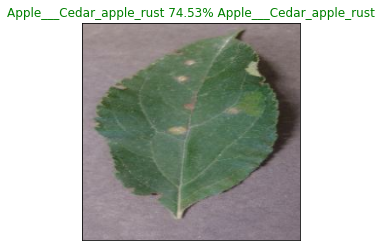

In [ ]:
get_pred(predictions, valid_labels, valid_images, 22)

In [ ]:
predictions.shape

(150, 20)

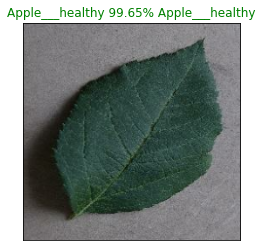

In [ ]:
get_pred(predictions, valid_labels, valid_images, 6)

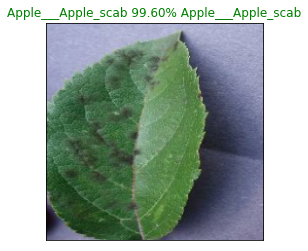

In [ ]:
get_pred(predictions, valid_labels, valid_images, 1)

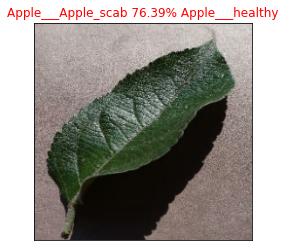

In [ ]:
get_pred(predictions, valid_labels, valid_images, 15)

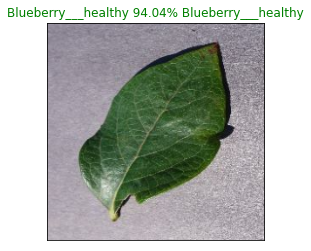

In [ ]:
get_pred(predictions, valid_labels, valid_images, 25)

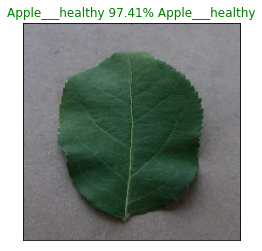

In [ ]:
get_pred(predictions, valid_labels, valid_images, 18)

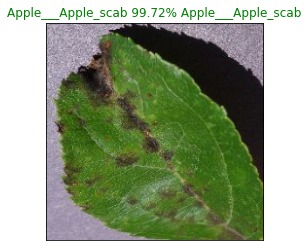

In [ ]:
get_pred(predictions, valid_labels, valid_images, 10)

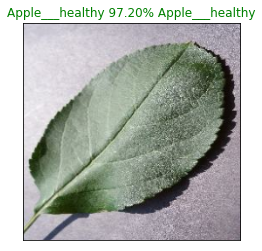

In [ ]:
get_pred(predictions, valid_labels, valid_images, 0)

In [ ]:
model.save('/content/drive/My Drive/BETA-FARM/Plant___Village/BETA-FARM.h5')

In [ ]:
pip install tensorflowjs

     |████████████████████████████████| 71kB 4.8MB/s 
     |████████████████████████████████| 92kB 4.9MB/s 
     |████████████████████████████████| 137.3MB 74kB/s 
     |████████████████████████████████| 256kB 47.6MB/s 
     |████████████████████████████████| 921kB 45.2MB/s 
  Created wheel for PyInquirer: filename=PyInquirer-1.0.3-cp36-none-any.whl size=32851 sha256=5f6b1490a9cf83cce3741d458a0fd4d5d7fafe2290a1ed238ad89b0eb444975c
  Stored in directory: /root/.cache/pip/wheels/52/6c/b1/3e4b0e8daf42a92883c7641c0ea8ffb62e0490ebed2faa55ad
Successfully built PyInquirer
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: tensorflow-hub 0.8.0
    Uninstalling tensorflow-hub-0.8.0:
      Successfully uninstalled tensorflow-hub-0.8.0
  Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Found existing installation: